<div style="display: flex; justify-content: center; align-items: center;">
  <img src="https://boldoutline.in/wp-content/uploads/2018/06/sunglasses-cover.jpg" 
       alt="My Image" 
       style="border-radius:15px; box-shadow:0 4px 10px rgba(0,0,0,0.3);">
</div>


# 🕶️ Glasses or No Glasses Classification  

This project is a task that focuses on classifying whether a person in an image is **wearing glasses** or **not**.  
The model is built using **Convolutional Neural Networks (CNNs)**, a deep learning technique commonly used for image recognition problems.  

---

## 🔑 Key Points:
- **Dataset**: Images of people with and without glasses.  
- **Goal**: Automatically detect the presence of glasses.  
- **Approach**:  
  - Data preprocessing (resizing, normalization, augmentation).  
  - CNN model design and training.  
  - Evaluation using accuracy and confusion matrix.  
- **Applications**:  
  - Face recognition systems.  
  - Smart attendance and security systems.  
  - Personalized recommendations (e.g., virtual try-on for glasses).  


## Importing Libraries

In [1]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import glob as gb
import tensorflow as tf
from tensorflow import keras
import pickle



import warnings 
warnings.filterwarnings('ignore')

2025-09-21 09:27:35.498686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758446855.653615      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758446855.703287      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 📂 Data Loading

In [2]:
IMG_SIZE = 224

class_map = {}
def load_images (base_path):
    X , y = [] ,[]
    classes = os.listdir(base_path)
    
    
    i = 0
    for cls in classes :
        class_map[cls] = i
        i+= 1
    
        files = gb.glob(os.path.join(base_path ,cls,"*.jpg"))
        print(f"Class '{cls}' has {len(files)} images.")
        
        for file in tqdm(files , desc =f"reading {cls}"):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(class_map[cls])
    return np.array(X, dtype="float32"), np.array(y)



In [3]:
# Get The bath of Each folder
base_dir = "/kaggle/input/glasses"
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "validate")
test_dir  = os.path.join(base_dir, "test")


In [4]:
X_train, y_train = load_images(train_dir)
X_val, y_val     = load_images(val_dir)
X_test , y_test= load_images(test_dir)


Class 'glasses' has 52 images.


reading glasses: 100%|██████████| 52/52 [00:00<00:00, 199.85it/s]


Class 'noglasses' has 52 images.


reading noglasses: 100%|██████████| 52/52 [00:00<00:00, 222.05it/s]


Class 'glasses' has 20 images.


reading glasses: 100%|██████████| 20/20 [00:00<00:00, 276.75it/s]


Class 'noglasses' has 20 images.


reading noglasses: 100%|██████████| 20/20 [00:00<00:00, 279.97it/s]


Class 'glasses' has 10 images.


reading glasses: 100%|██████████| 10/10 [00:00<00:00, 299.07it/s]


Class 'noglasses' has 10 images.


reading noglasses: 100%|██████████| 10/10 [00:00<00:00, 280.69it/s]


In [5]:
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_val:", X_val.shape, " y_val:", y_val.shape)
print("X_test:", X_test.shape ,"y_test:", y_test.shape ,)

X_train: (104, 224, 224, 3)  y_train: (104,)
X_val: (40, 224, 224, 3)  y_val: (40,)
X_test: (20, 224, 224, 3) y_test: (20,)


In [6]:
print(class_map)

{'glasses': 0, 'noglasses': 1}


In [7]:
# make Date mixing betweenClasses
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)

## Sample Representation


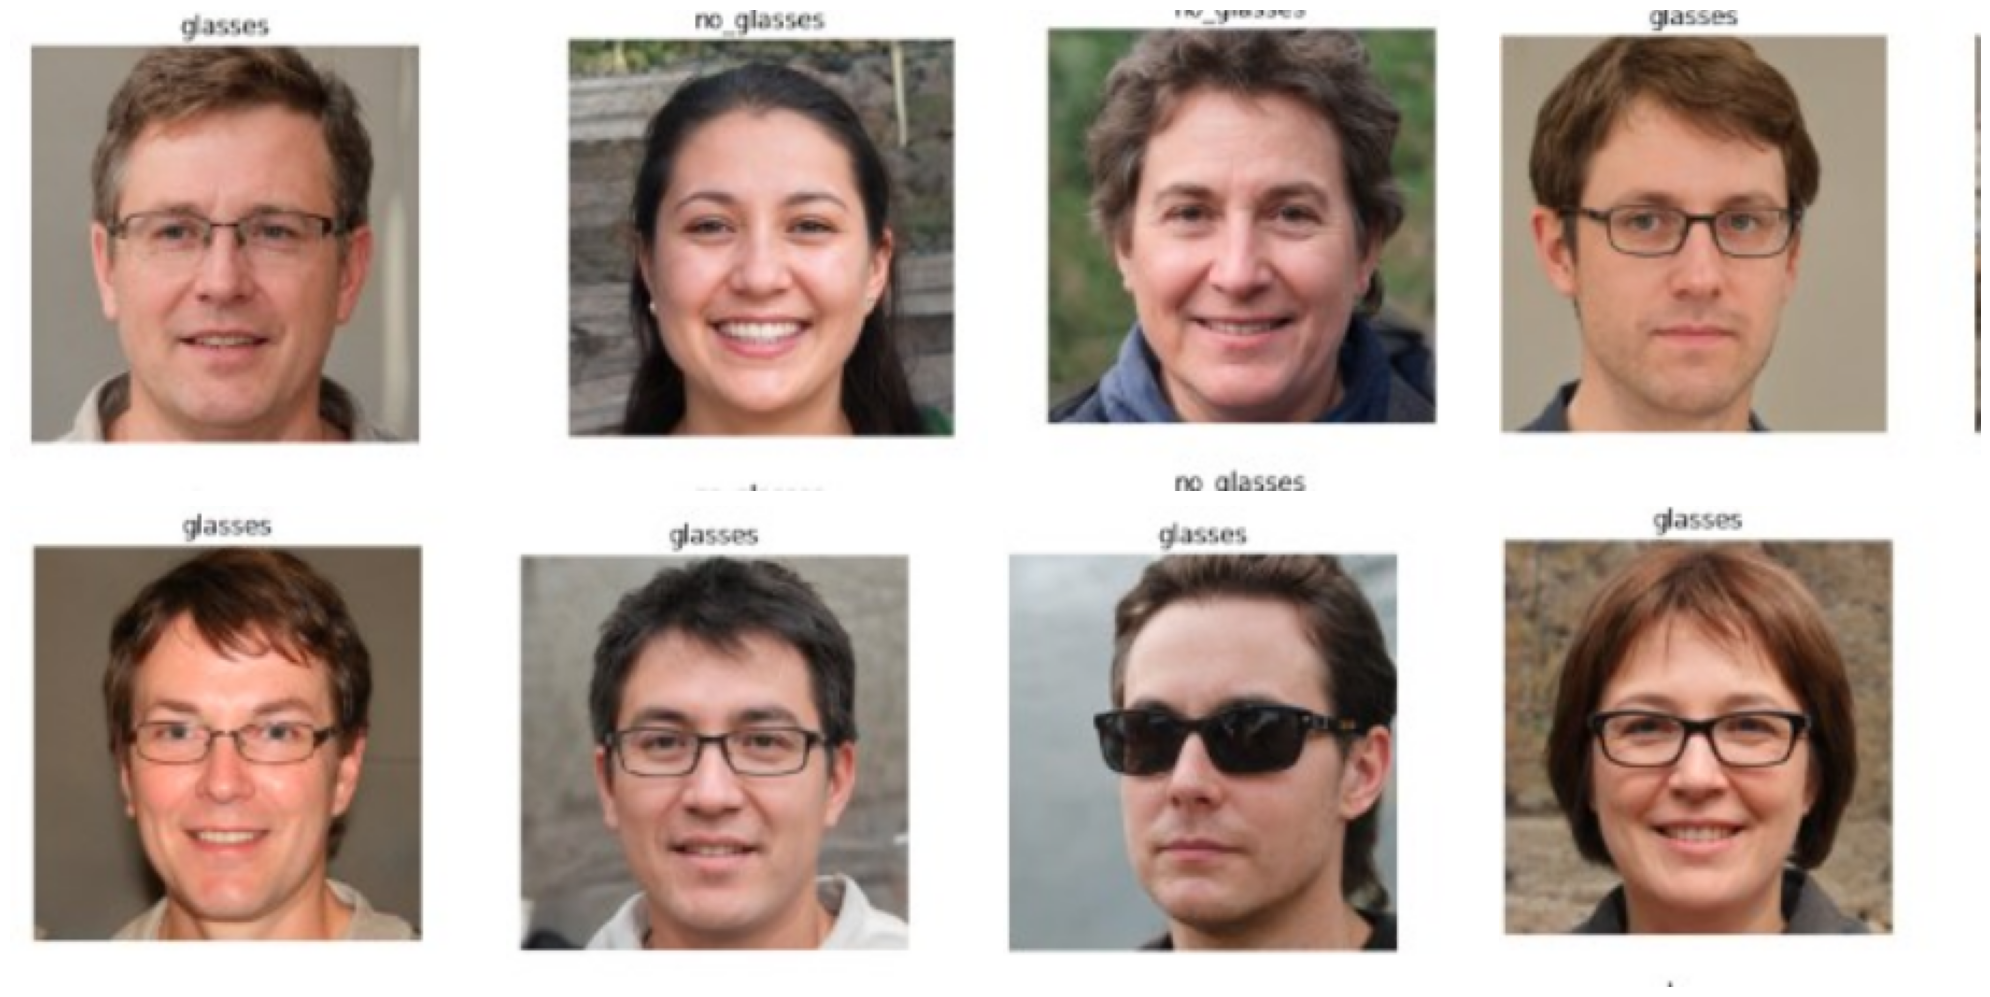

In [8]:
classes = {0: "glasses", 1: "noglasses"}

plt.figure(figsize=(20,20))

for i in range (1,9):
    plt.subplot(4, 4, i)
    plt.imshow(X_train[i].astype("uint8"))
    plt.axis('off')

plt.tight_layout()
plt.show()

## Normalizing Data 


In [9]:
X_train=X_train/255.0
X_val=X_val/255.0
X_test = X_test / 255.0

## 🌀 Data Augmentation


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    
)

datagen.fit(X_train)


## 🧠 CNN Model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=8,             
    restore_best_weights=True) 

In [12]:
# Building the model
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3), padding='same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile Model
model.compile(loss="binary_crossentropy", optimizer= 'Adam', metrics=["accuracy","precision","recall"])


# Fitting Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    shuffle=True,
    verbose=2,
    callbacks=[early_stop]
)

I0000 00:00:1758446871.373583      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1758446875.411513      61 service.cc:148] XLA service 0x7fc07400d600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758446875.412139      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758446875.709308      61 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1758446877.549679      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 - 7s - 1s/step - accuracy: 0.4038 - loss: 0.6968 - precision: 0.4194 - recall: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/100
7/7 - 0s - 23ms/step - accuracy: 0.5000 - loss: 0.6945 - precision: 0.5000 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/100
7/7 - 0s - 23ms/step - accuracy: 0.5000 - loss: 0.6932 - precision: 0.5000 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/100
7/7 - 0s - 22ms/step - accuracy: 0.5000 - loss: 0.6932 - precision: 0.5000 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/100
7/7 - 0s - 22ms/step - accuracy: 0.4712 - loss: 0.6939 - precision: 0.4571 - recall: 0.3077 - val_accuracy: 0.5000 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/100
7/7 - 0s - 21ms/step - accuracy: 0.5288

## 🧠 Transfer Learning Model

### Checkpoint to Save Best models and Weights

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_model.h5",            
    monitor="val_accuracy",       
    mode="max",                   
    save_best_only=True,        
    verbose=2
)


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  

model2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


# Compile Model
model2.compile(loss="binary_crossentropy", optimizer= 'Adam', metrics=["accuracy","precision","recall"])



# Fitting Model
history2 = model2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    shuffle=True,
    verbose=2,
    callbacks=[early_stop, checkpoint])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.90000, saving model to best_model.h5
7/7 - 13s - 2s/step - accuracy: 0.6538 - loss: 0.9687 - precision: 0.6538 - recall: 0.6538 - val_accuracy: 0.9000 - val_loss: 0.2152 - val_precision: 1.0000 - val_recall: 0.8000
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.90000
7/7 - 0s - 65ms/step - accuracy: 0.8750 - loss: 0.3734 - precision: 0.8824 - recall: 0.8654 - val_accuracy: 0.8500 - val_loss: 0.2521 - val_precision: 0.7917 - val_recall: 0.9500
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.90000
7/7 - 0s - 65ms/step - accuracy: 0.9135 - loss: 0.2904 - precision: 0.9216 - recall: 0.9038 - val_accuracy: 0.8250 - val_loss: 0.3785 - val_precision: 0.7407 - val_recall: 1.0000
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.90000
7/7 - 0s - 64ms/step - accuracy: 0.9423 - loss: 0.1054 - precision: 0.9259 - recall: 0.9615 - val_accuracy: 0.8750 - val_loss

## 📊 Model Evaluation
In this section, we evaluate the performance of the trained model using:  
- **Accuracy**
- **Percision**
- **Recall**
- **Loss Curves**  
- **Confusion Matrix**  
- **Classification Report (Precision, Recall, F1-score)**  


In [15]:
import seaborn as sns
sns.set()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

precision = history2.history['precision']
val_precision = history2.history['val_precision']

recall =history2.history['recall']
val_recall =history2.history['val_recall']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

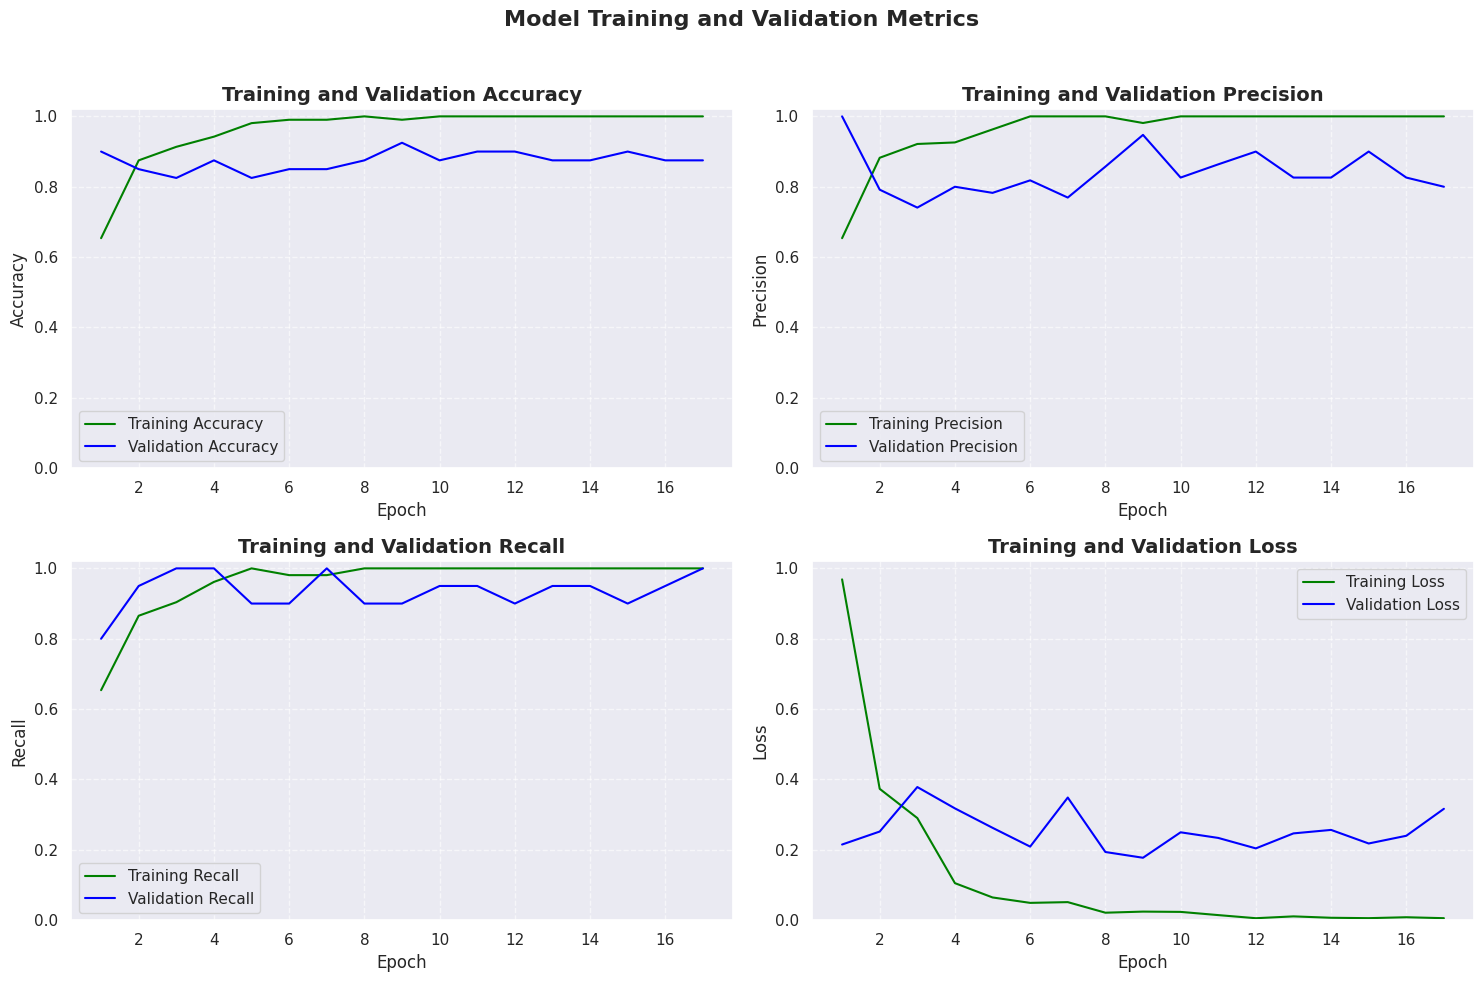

In [16]:
plt.figure(figsize=(15, 10))

# 1. Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, precision, color='green', label='Training Precision')
plt.plot(epochs, val_precision, color='blue', label='Validation Precision')
plt.title('Training and Validation Precision', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='blue', label='Validation Recall')
plt.title('Training and Validation Recall', fontsize=14, fontweight='bold')
plt.ylabel('Recall', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Loss
plt.subplot(2, 2, 4)
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Training and Validation Metrics', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [17]:
model_evaluate = model2.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0249 - precision: 1.0000 - recall: 1.0000
Loss     :  0.024868829175829887
Accuracy :  1.0
Precision  :  1.0
Recall :  1.0


In [18]:
y_prob = model2.predict(X_test).reshape(-1)
y_pred = (y_prob >= 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


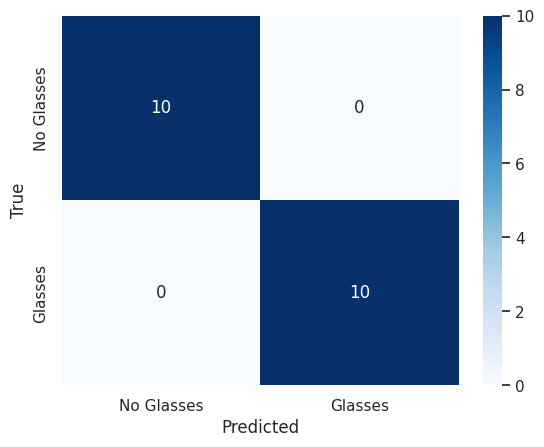

In [19]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Glasses','Glasses'],
            yticklabels=['No Glasses','Glasses'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred,
    target_names=['No Glasses', 'Glasses'],
    zero_division=0
))


              precision    recall  f1-score   support

  No Glasses       1.00      1.00      1.00        10
     Glasses       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# 🎯 Model Demo: Glasses or No Glasses  

In this section, we demonstrate how the trained CNN model can classify a new image directly from a URL.  

Steps:  
1. **Fetch Image**: Download image from the internet using its link.  
2. **Preprocess**: Resize and normalize the image to match the model’s input.  
3. **Prediction**: The model predicts whether the person is wearing **Glasses** or **No Glasses**.  
4. **Visualization**: Display the image alongside the prediction result.  

---


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


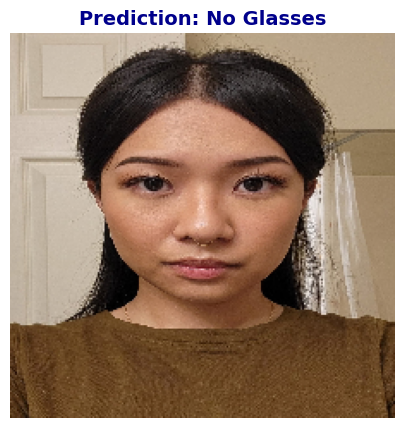

In [21]:
import requests
from io import BytesIO
from PIL import Image

IMG_SIZE = 224
path = 'https://external-preview.redd.it/feeling-like-my-face-looks-weird-without-my-glasses-can-i-v0-31Su842KZjUAYtEE2tDS7XpbDPZScb1EgCIhYWuC7Pk.jpg?auto=webp&s=e7b2af1733517a6881033e2fdf12dad68194d04b'

response = requests.get(path)
img = Image.open(BytesIO(response.content))
img = np.array(img)

if img.ndim == 2:  
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
elif img.shape[2] == 4:  
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)


img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))



img_norm = img_resized.astype("float32") / 255.0
img_norm = np.expand_dims(img_norm, axis=0)


pr = model2.predict(img_norm)
pr = (pr >= 0.5).astype(int)

label = "Glasses" if pr == 0 else "No Glasses"


plt.figure(figsize=(5,5))
plt.imshow(img_resized.astype("uint8"))
plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold', color="darkblue")
plt.axis("off")
plt.show()
